# Geostore functions

Convienience functions for creating, calling, and viewing geostore objects across different environments.

## Create a new Geojson object

In [31]:
import requests
import json
%matplotlib inline

In [164]:
# create a geostore in a specific environment

local = 'http://localhost:9000'
production = 'https://production-api.globalforestwatch.org'
staging = 'https://staging-api.globalforestwatch.org'

In [165]:
body = json.loads(json.dumps({"geojson":{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -65.859636,
              46.153145
            ],
            [
              -65.85917,
              45.97473
            ],
            [
              -65.450837,
              45.974952
            ],
            [
              -65.449738,
              46.156158
            ],
            [
              -65.859636,
              46.153145
            ]
          ]
        ]
      }
    }
  ]
}}))

body


{'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-65.859636, 46.153145],
       [-65.85917, 45.97473],
       [-65.450837, 45.974952],
       [-65.449738, 46.156158],
       [-65.859636, 46.153145]]]}}]}}

In [166]:
header= {
         'Content-Type':'application/json'
        }


url = staging + '/v1/geostore'
r = requests.post(url, headers=header, json=body)

r.json()

{'data': {'type': 'geoStore',
  'id': 'db3b05875784bdb05626afb94bcc1bd4',
  'attributes': {'geojson': {'features': [{'properties': None,
      'type': 'Feature',
      'geometry': {'type': 'Polygon',
       'coordinates': [[[-65.859636, 46.153145],
         [-65.85917, 45.97473],
         [-65.450837, 45.974952],
         [-65.449738, 46.156158],
         [-65.859636, 46.153145]]]}}],
    'crs': {},
    'type': 'FeatureCollection'},
   'hash': 'db3b05875784bdb05626afb94bcc1bd4',
   'provider': {},
   'areaHa': 63250.309032422614,
   'bbox': [-65.859636, 45.97473, -65.449738, 46.156158],
   'lock': False,
   'info': {'use': {}}}}}

## Retrieve a Geostore object

In [135]:
# Set the environments
local = 'http://localhost:9000'
production = 'https://production-api.globalforestwatch.org'
staging = 'https://staging-api.globalforestwatch.org'

In [136]:
geostore_id = '5959fc775b21b05e79eadb9c05bb7524'

In [137]:
# Plot a geostore

geostore_url = local + f'/v1/geostore/{geostore_id}'

r3 = requests.get(geostore_url)
r3.status_code
geojson = r3.json().get('data').get('attributes').get('geojson')

In [138]:
geojson

{'features': [{'properties': None,
   'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-63.78662109375, -5.06905782678403],
      [-66.15966796875, -7.62388685312004],
      [-64.53369140625, -9.01530233342059],
      [-63.544921875, -10.9196177602547],
      [-61.5234375, -9.68739843076061],
      [-60.31494140625, -8.71135887542651],
      [-61.69921875, -6.88280024176756],
      [-62.81982421875, -5.11282977849945],
      [-63.78662109375, -5.06905782678403]]]}}],
 'crs': {},
 'type': 'FeatureCollection'}

## Testing V2 and plot-preview of geostore using geopandas
(Geo all the things!)

In [56]:
import json
from colorama import Fore, Back, Style
import geopandas as gpd
import time

In [181]:
def preview_geostore(end_url=None, env='staging'):
    """
    E.g. end_url = 'BRA/1/1&simplify=0.9'
    """
    
    environment = {'local': 'http://localhost:9000',
            'production': 'https://production-api.globalforestwatch.org',
            'staging': 'https://staging-api.globalforestwatch.org'}
    start = time.clock()
    geostore_url = environment[env] + f'/v2/geostore/' + end_url
    # Get response
    r3 = requests.get(geostore_url)
    if r3.status_code is not 200:
        print(Fore.RED + f"{r3.status_code}: {r3.json().get('errors')[0].get('detail')}")
        return
    stop = time.clock()
    print(f"Request finished in {(stop - start) * 100: 3.3f}s")
    geojson = r3.json().get('data').get('attributes').get('geojson')
    # Extract geojson, save to tmp file, and plot
    geojson = r3.json().get('data').get('attributes')
    with open('./test.geojson', 'w') as outfile:
        json.dump(geojson, outfile)
    df = gpd.read_file('/Users/Ben/Desktop/test.geojson')
    df.plot(color ='#2e6d02', figsize=(6,6))

Request finished in  3.585s
CPU times: user 101 ms, sys: 5.43 ms, total: 106 ms
Wall time: 1.25 s


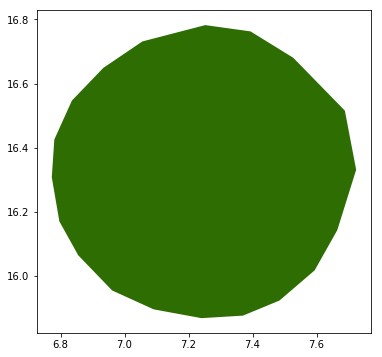

In [182]:
%%time
preview_geostore('admin/CAN/1/1?simplify=true', env='production')

Request finished in  4.571s
CPU times: user 358 ms, sys: 15.3 ms, total: 373 ms
Wall time: 3.57 s


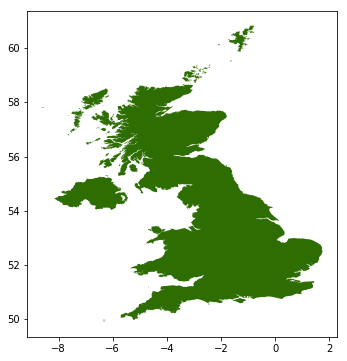

In [179]:
%%time
preview_geostore('admin/GBR?simplify=True', env='production')

CPU times: user 320 ms, sys: 13.3 ms, total: 333 ms
Wall time: 3.53 s


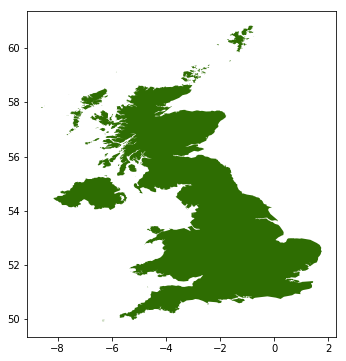

In [92]:
%%time
preview_geostore('admin/GBR?simplify=0.01')